# Customer Churn Analysis

Project Description


Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
# Load dataset
df = pd.read_csv('Telecom_customer_churn.scv.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Let's explore variables, their data types, and total non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see, this dataset has 21 features, with a mix of categorical and numerical features.

In [6]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [7]:
df.shape

(7032, 21)

In [24]:
# counting the missing values
df.isnull().sum()

customerID                               0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
tenure_norm                              0
MonthlyCharges_norm                      0
ClusterLabel                             0
gender_Male                              0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport

There are no null values in the dataset

In [8]:
# summary stats
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# Label ratio
df['Churn'].value_counts(normalize = True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='count'>

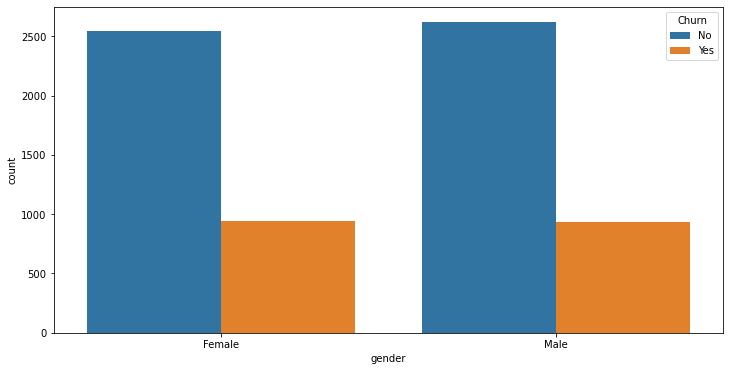

In [10]:
# Distribution of gender based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'gender', hue = 'Churn', data = df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

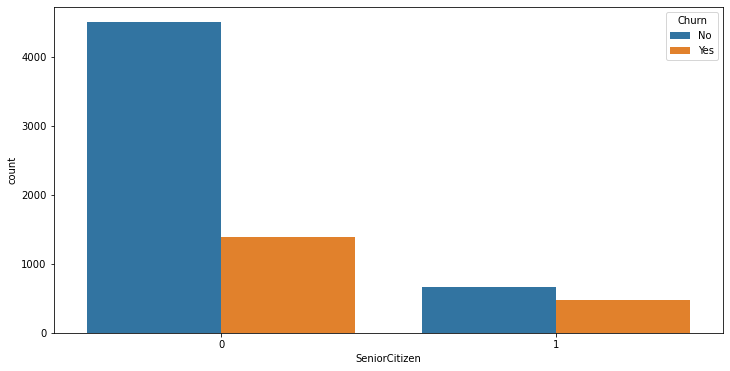

In [11]:
# Distribution of senior citizens based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

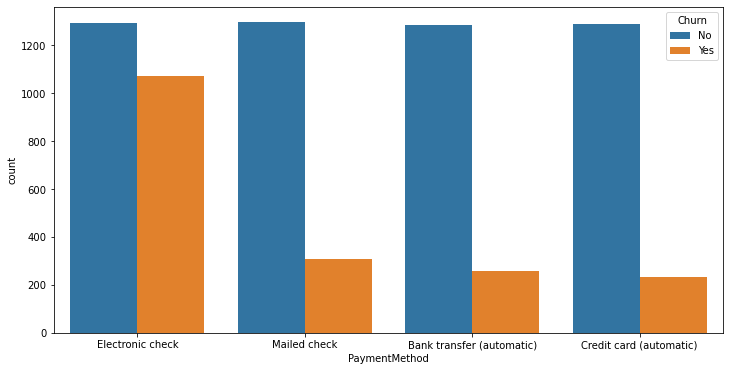

In [12]:
# Distribution of payment method based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

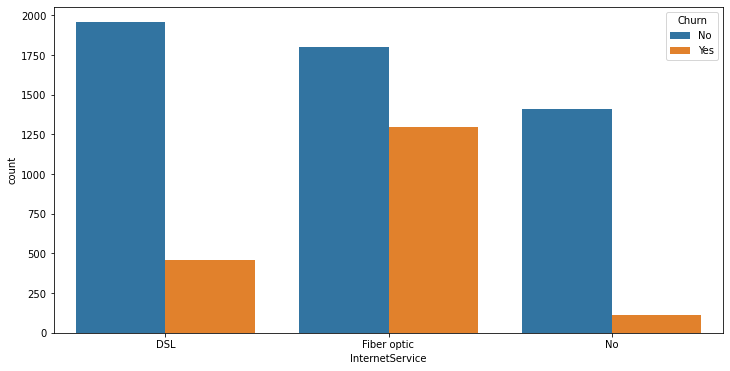

In [13]:
# Distribution of internet service based on churn status
plt.figure(figsize = (12,6))
sns.countplot(x = 'InternetService', hue = 'Churn', data = df)

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

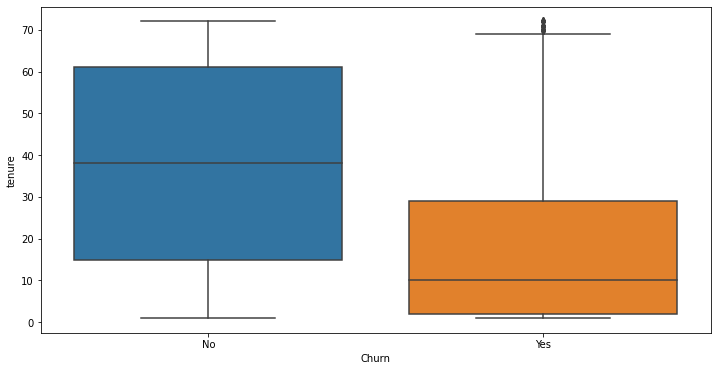

In [14]:
# Distribution of tenure based on churn status
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Churn', y ='tenure', data = df)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

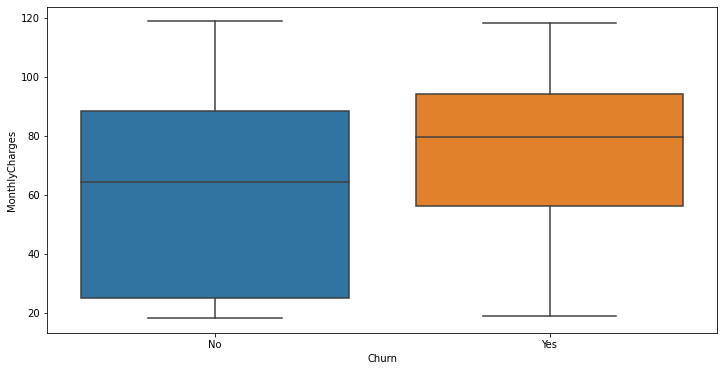

In [15]:
# Distribution of monthly charges based on churn status
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Churn', y ='MonthlyCharges', data = df)

<AxesSubplot:>

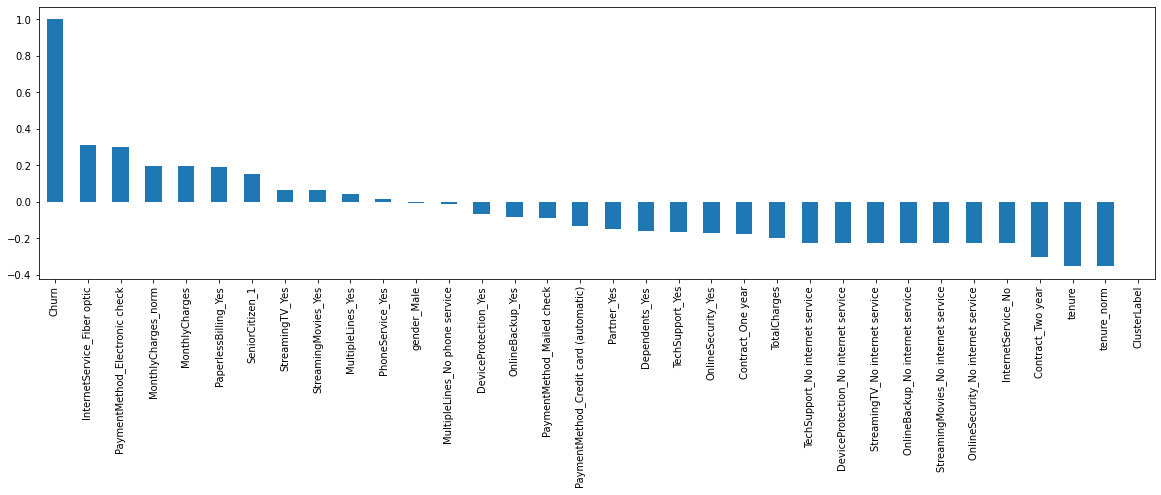

In [25]:
# Show correlation plot for correlation of churn with each of the remaining features
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

In [23]:
#Looping through the columns to get unique values per column
for i in df.columns:
    print(f"Unique {i} count:{df[i].nunique()}")
    print(f"{df[i].unique()}\n")

Unique customerID count:7032
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique tenure count:72
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

Unique MonthlyCharges count:1584
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

Unique TotalCharges count:6530
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

Unique Churn count:2
[0 1]

Unique tenure_norm count:72
[-1.28024804  0.06430269 -1.23950408  0.51248626 -0.99504031 -0.42462485
 -0.91355239 -0.18016108  1.2051336  -0.7913205  -0.66908862  1.04215776
  0.6754621  -0.30239297  1.49034133  0.79769399  1.57182925 -0.46536881
 -0.83206446 -0.09867316  0.59397418  1.61257321 -0.62834466 -0.22090504
 -1.11727219  0.55323022 -0.87280842  1.53108529  1.24587756  0.43099834
 -0.70983258  1.12364568 -0.5876007   1.36810945 -0.954296

In [20]:
# map target labels to 0 and 1
label_mapping = {'No': 0, 'Yes': 1}
df['Churn'] = df['Churn'].map(label_mapping)

# one hot encoding
cols_to_encode = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df = pd.get_dummies(data = df, columns = cols_to_encode, drop_first = True)

# split data into train and test
feature_cols  = df.columns.tolist()
feature_cols = [i for i in feature_cols if i not in ['customerID', 'Churn']]
x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df['Churn'], test_size = 0.2, random_state = 1234)

In [21]:
# Initiate and fit Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
decision_tree_classifier.fit(x_train, y_train)

# Predict label for the test data and print classification report and confusion matrix
prediction_values_dt = decision_tree_classifier.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_dt, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_dt))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1048
           1       0.59      0.54      0.57       359

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.79      0.79      1407

[[914 134]
 [164 195]]


In the above figure that accuracy is 79%. The precision and recall for the positive class are 59% and 54%, respectively. Let’s build a Random Forest classifier next and check whether we get any improvement in accuracy, precision, and recall score or not.

In [22]:
# Initialize Random Forest Model
random_forest = RandomForestClassifier(n_estimators = 1000, max_depth = 3, random_state = 1234)
random_forest.fit(x_train, y_train)

# Predict label for the test data and print classification report and confusion matrix
prediction_values_rf = random_forest.predict(x_test)
print(metrics.classification_report(y_test, prediction_values_rf, digits = 2))
print(metrics.confusion_matrix(y_test, prediction_values_rf))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1048
           1       0.66      0.31      0.43       359

    accuracy                           0.78      1407
   macro avg       0.73      0.63      0.65      1407
weighted avg       0.77      0.78      0.76      1407

[[991  57]
 [246 113]]


With Random Forest, we got an accuracy of 78%, slightly less than the decision tree. This model's precision and recall score is 66% and 31%, respectively.

So, we can conclude that we get better precision using Random Forest, but with decision tree recall/coverage is better